# Linear Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

<b>Goals</b>

- Learn ins and outs of linear regression. How it fits data and makes predictions.
- Understand key terms
- How to interpret, improve and evaluate a linear regression model.
- How to use it with sklearn and statsmodels libraries
- Cross validation with linear regression
- Work together as a class to model the King County housing dataset

## Simple linear regression

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- We must "learn" the values of these coefficients to create our model.
- And once we've learned these coefficients, we can use the model to predict the target variable.

### Estimating ("learning") model coefficients

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

![Estimating coefficients](images/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Slope-intercept](images/slope_intercept.png)

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)


Linear Regression is highly **parametric**, meaning that is relies heavily ont he underlying shape of the data. If the data fall into a line, then lienar regression will do well. If the data does not fall in line (get it?) linear regression is likely to fail.


Let's use linear regression to model advertising data.

In [2]:
#Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the observations?

- Each observation represents **one market** (200 markets in the dataset)

What are the features?

- **TV:** advertising dollars spent on TV for a single product (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?

- **Sales:** sales of a single product in a given market (in thousands of widgets)

Questions:


1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

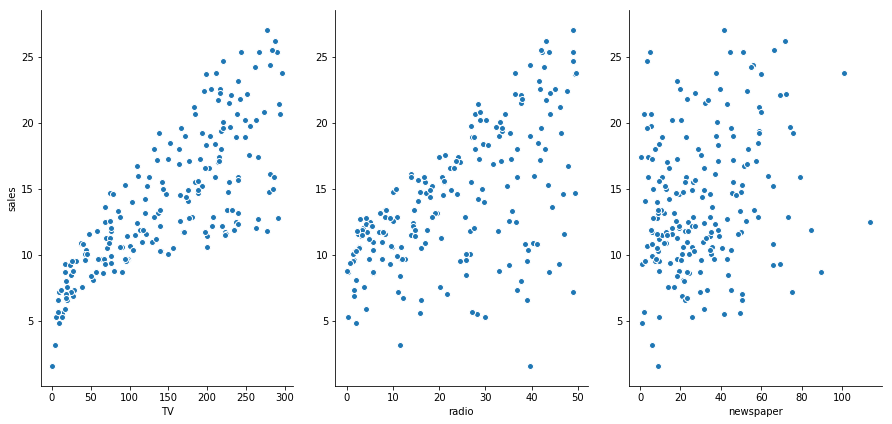

In [6]:
# scatter plot in Seaborn, create chart with specific things on the x axis
sns.pairplot(data, x_vars = ["TV", "radio", "newspaper"], y_vars = "sales", size = 6, aspect =.7)

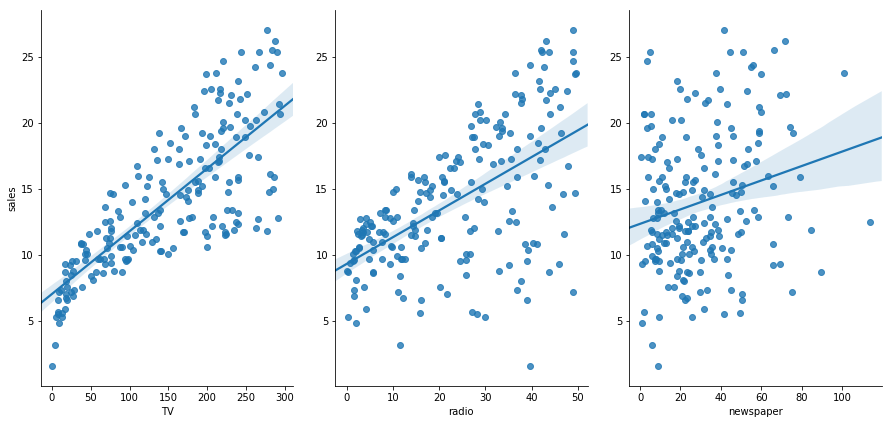

In [7]:
# include a "regression line"
sns.pairplot(data, x_vars = ["TV", "radio", "newspaper"], y_vars = "sales", size = 6, aspect =.7, kind ="reg")

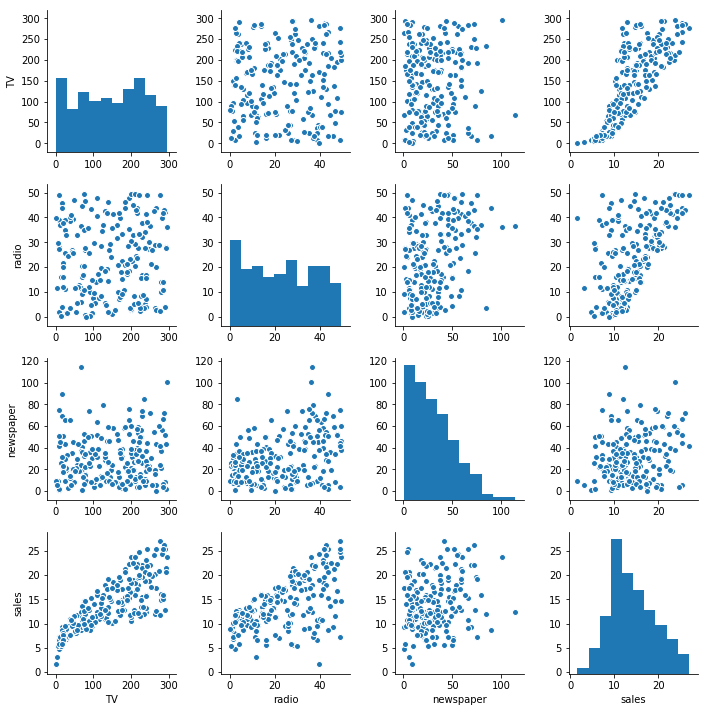

In [8]:
#Visualize relationships between variables with pairplot

sns.pairplot(data);

In [9]:
# compute correlation matrix
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Modeling time

In [78]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula = "sales ~ TV", data = data).fit()

# print the coefficients
lm.params

#In this model have an intercept of 7.03
# Beta is .04, if put more money in TV then sales should go up because its positive

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X,y)
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

# IF put money in TV then for every unit increase in TV advertising, should expect a .0475 unit increase in sales


7.03259354913
[ 0.04753664]


### Interpreting model coefficients

How do we interpret the TV coefficient ($\beta_1$)?

- A "unit" increase in TV ad spending is **associated with** a 0.0475 "unit" increase in Sales.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.
- This is not a statement of **causation**.

If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Using the model for prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times 50$$

In [13]:
# manually calculate the prediction
7.0326+0.0475*50

#If increase TV spend by 50K, then would expect a 9.4 increase in units

9.4076

In [15]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({"TV": [50]})

# predict for a new observation
lm.predict(X_new)

0    9.409426
dtype: float64

In [16]:
### SCIKIT-LEARN ###

# predict for a new observation
linreg.predict(X_new)

array([ 9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Does the scale of the features matter?

Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?

In [17]:
data['TV_dollars'] = data.TV *1000
data.head()

,TV,radio,newspaper,sales,TV_dollars
1,230.1,37.8,69.2,22.1,230100.0
2,44.5,39.3,45.1,10.4,44500.0
3,17.2,45.9,69.3,9.3,17200.0
4,151.5,41.3,58.5,18.5,151500.0
5,180.8,10.8,58.4,12.9,180800.0


In [18]:
#Use sklearn to model data TV_dollars vs sales

# create X and y
feature_cols = ['TV_dollars']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linreg = LinearRegression()

linreg.fit(X,y)
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

7.03259354913
[  4.75366404e-05]


In [20]:
# predict for a new observation
linreg.predict(50000)

array([ 9.40942557])

The scale of the features is **irrelevant** for linear regression models, since it will only affect the scale of the coefficients, and we simply change our interpretation of the coefficients.

Let's use the sklearn model to graph TV versus sales and the predicted TV values vs sales

In [21]:
#Fixing data order for plotting, otherwise line might go backwards
data.sort_values("TV", inplace=True)
X = data[["TV"]]
y = data.sales
linreg = LinearRegression()
linreg.fit(X, y)
preds = linreg.predict(X)

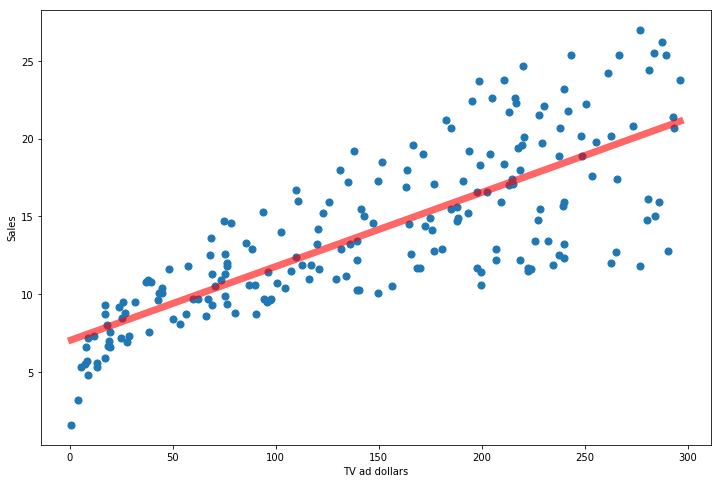

In [22]:
#Make predictions by passing X into model


#Set plot size to (12,8)
plt.figure(figsize=(12, 8))

#Make scatter of X and y
plt.scatter(X.values,y, s = 50)
#Make line plot of X and preds
plt.plot(X.values, preds, "r", linewidth= 7, alpha = .6)

plt.xlabel("TV ad dollars")
plt.ylabel("Sales");


Plotting the residuals

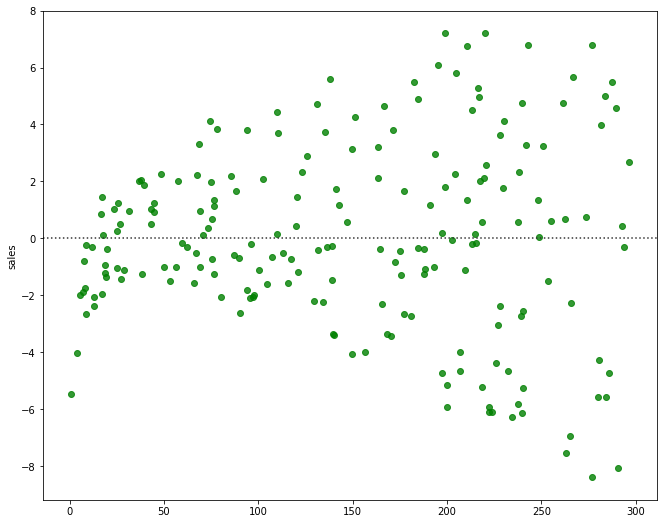

In [23]:
# Plot the residuals after fitting a linear model
plt.figure(figsize=(11, 9))
sns.residplot(X.values, y, color="g");

## Bias and variance

Linear regression is a low variance/high bias model:

- **Low variance:** Under repeated sampling from the underlying population, the line will stay roughly in the same place
- **High bias:** The line will rarely fit the data well

A closely related concept is **confidence intervals**.

## Confidence intervals

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [24]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


- We only have a **single sample of data**, and not the **entire population of data**.
- The "true" coefficient is either within this interval or it isn't, but there's no way to actually know.
- We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.
- From Quora: [What is a confidence interval in layman's terms?](http://www.quora.com/What-is-a-confidence-interval-in-laymans-terms/answer/Michael-Hochster)

Note: 95% confidence intervals are just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

A closely related concept is **hypothesis testing**.

For model coefficients, here is the conventional hypothesis test:

- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis?

- The **p-value** is the probability that the relationship we are observing is occurring purely by chance.
- If the 95% confidence interval for a coefficient **does not include zero**, the p-value will be **less than 0.05**, and we will reject the null (and thus believe the alternative).
- If the 95% confidence interval **includes zero**, the p-value will be **greater than 0.05**, and we will fail to reject the null.

In [25]:
#Show summary table of stats models
lm.summary()

#Tells the coefficients and the p values and the confidence intervals

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           1.47e-42
Time:                        19:20:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Thus, a p-value less than 0.05 is one way to decide whether there is **likely** a relationship between the feature and the response. In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How well does the model fit the data?

R-squared:

- A common way to evaluate the overall fit of a linear model
- Defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model
- Also defined as the reduction in error over the **null model**, which is the model that simply predicts the mean of the observed response
- Between 0 and 1, and higher is better

![q](https://i.stack.imgur.com/xb1VY.png)

![s](https://i.stack.imgur.com/8OMsa.png)


Here's an example of what R-squared "looks like":

R2 basically measures how well a model does versus the mean.

![R-squared](images/r_squared.png)

In [27]:
#Stats models
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

In [28]:
#Sklearn
#Method number one
linreg.score(X,y)

0.61187505085007099

In [29]:
#Method number two
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

0.61187505085007099

- The threshold for a **"good" R-squared value** is highly dependent on the particular domain.
- R-squared is more useful as a tool for **comparing models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [30]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X,y)


# print the coefficients
print (linreg.coef_)
print (linreg.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.93888936946


In [82]:
### STATSMODELS ###

# create a fitted model with all three features
lm = smf.ols(formula="sales ~ TV + radio + newspaper", data = data).fit()

lm.params

#TV Coefficient is similar, radio is higher returns, newspaper is a non existent

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

For a given amount of Radio and Newspaper spending, an increase of $1000 in **TV** spending is associated with an **increase in Sales of 45.8 widgets**.

For a given amount of TV and Newspaper spending, an increase of $1000 in **Radio** spending is associated with an **increase in Sales of 188.5 widgets**.

For a given amount of TV and Radio spending, an increase of $1000 in **Newspaper** spending is associated with an **decrease in Sales of 1.0 widgets**. How could that be?

### Feature selection

How do I decide **which features to include** in a linear model?


#### Using p-values

We could try a model with all features, and only keep features in the model if they have **small p-values**:

In [33]:

### STATSMODELS ###

# create a fitted model with all three features
lm = smf.ols(formula = "sales ~ TV + radio + newspaper", data = data).fit()

# print the p-values for the model coefficients
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

This indicates we would reject the null hypothesis for **TV and Radio** (that there is no association between those features and Sales), and fail to reject the null hypothesis for **Newspaper**. Thus, we would keep TV and Radio in the model.

However, this approach has **drawbacks**:

- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.

### Using R-squared

We could try models with different sets of features, and **compare their R-squared values**:

In [34]:
# R-squared value for the model with two features
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.89719426108289557

In [35]:
# R-squared value for the model with three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.89721063817895208

This would seem to indicate that the best model includes **all three features**. Is that right?

- R-squared will always increase as you add more features to the model, even if they are **unrelated** to the response.
- As such, using R-squared as a model evaluation metric can lead to **overfitting**.
- **Adjusted R-squared** is an alternative that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

As well, R-squared depends on the same assumptions as p-values, and it's less reliable if those assumptions are violated.

## Train-test split, cross validation, and evaluation metrics

A better approach to feature selection!

- They attempt to directly estimate how well your model will **generalize** to out-of-sample data.
- They rely on **fewer assumptions** that linear regression.
- They can easily be applied to **any model**, not just linear models.

### Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [37]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [38]:
#Calculate MAE using sklearn
metrics.mean_absolute_error(y_true, y_pred)


10.0

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [39]:
#Calculate MSE using sklearn
metrics.mean_squared_error(y_true, y_pred)

150.0

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [40]:
#Calculate RMSE 

metrics.mean_squared_error(y_true, y_pred) ** .5


12.24744871391589

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [41]:
# same true values as above
y_true = [100, 50, 30, 20]

# new set of predicted values
y_pred = [60, 50, 30, 20]

# MAE is the same as before
print (metrics.mean_absolute_error(y_true, y_pred))

# RMSE is larger than before
print (np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
20.0


### Using train/test split for feature selection

Let's use train/test split with RMSE to decide whether Newspaper should be kept in the model:

In [42]:
#Re import data
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

X = data.drop("sales", axis = 1)
y = data.sales

In [44]:
#Make train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=30)

In [47]:
#Fit model on training data and apply it on both training and testing data

#Intialize model
lr = LinearRegression()
lr.fit(X_train, y_train)

#Test model on training data
train_score = lr.score(X_train, y_train)
print ("Training R2 score is {}".format(train_score))
#Test model on testing data
test_score = lr.score(X_test, y_test)
print ("Testing R2 score is {}".format(test_score))



Training R2 score is 0.887504461561
Testing R2 score is 0.919167408637


What does this tell us? 

In [48]:
# define a function that accepts X and y and computes testing RMSE
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean() # return average RMSE

In [50]:
# include Newspaper
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
cross_val_rmse(X,y)

#Predictions within 1.7 widgets from real number of widgets

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\sit

1.7175247278732086

In [51]:
# exclude Newspaper 
feature_cols = ['TV', 'radio']
X = data[feature_cols]
cross_val_rmse(X,y)

#When take out newspaper, it goes down, meaning newspaper is making the model worse

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\sit

1.7026625340333177

In [52]:
# only TV
feature_cols = ['TV']
X = data[feature_cols]
cross_val_rmse(X,y)

#Number is much higher when only model on 1 feature
#This number is highly dependent on the context of your data
#Example: using housing data and root mean squared error is $300K in North Dakota its a bad model, probably a bad error because houses are probably around that price, if that is data for San Francisco then 300K might be good
# When analyzing data, needs to really look at the context of that data

C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\lyoung\Anaconda\lib\sit

3.2756686834314559

Let's try this process again change scoring metrics to R2

In [54]:
#Make cross val function with R2
# include Newspaper
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]

cross_val_score(LinearRegression(), X, y, cv=5, scoring = "r2").mean()

0.8871063495438436

In [55]:
#Make cross val function with R2
# Exclude Newspaper
feature_cols = ['TV', 'radio']
X = data[feature_cols]

cross_val_score(LinearRegression(), X, y, cv=5, scoring = "r2").mean()

0.88928295730645301

In [56]:
#Make cross val function with R2
# Only TV
feature_cols = ['TV']
X = data[feature_cols]

cross_val_score(LinearRegression(), X, y, cv=5, scoring = "r2").mean()


0.59260008436482559

What do these results tell us? Which metric do you prefer? The R2 or RMSE?

In [ ]:
# Use both to evaluate model

### Collinearity

In [57]:
# Load the data in
df = pd.read_pickle("../../data/survey_data.pkl")
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 7 columns):
Y     30 non-null int64
X1    30 non-null int64
X2    30 non-null int64
X3    30 non-null int64
X4    30 non-null int64
X5    30 non-null int64
X6    30 non-null int64
dtypes: int64(7)
memory usage: 1.9 KB


In [58]:
# View the correlations
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.825418,0.426117,0.623678,0.590139,0.156439,0.155086
X1,0.825418,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
X2,0.426117,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
X3,0.623678,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
X4,0.590139,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
X5,0.156439,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
X6,0.155086,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


#### Correlation and Multicollinearity
We notice that some of the variables are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

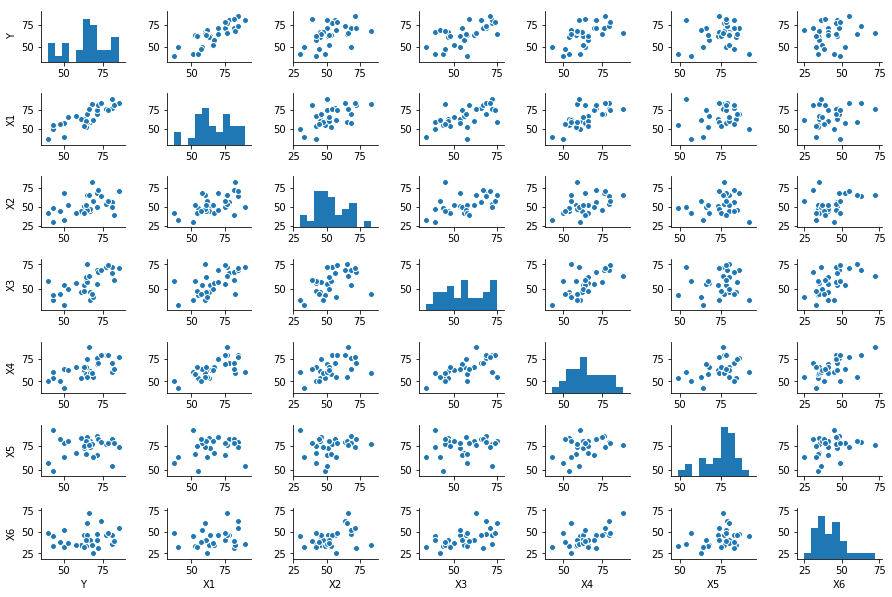

In [59]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, size = 1.2, aspect=1.5)

What do you notice?

Let's model this data using linear regresion in sklearn

In [60]:
# Intialize an empty model
lr = LinearRegression()

# Assign X and y
X = df.drop("Y", axis = 1)
# Choose the response variable(s)
y = df.Y
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.7326019925311491

Run this again but only X1, X3, X4, the three most correlated variables with Y

In [61]:
# Intialize an empty model
lr = LinearRegression()

# Assign X and y
X = df[["X1", "X3", "X4"]]
# Choose the response variable(s)
y = df.Y
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.70829160796161106

What effect did this have?

In [ ]:
#Using most correlated made the model go down, but if added in other variables it only increases by .03
#Model is slightly worse but only using half the features

In [62]:
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.825418,0.426117,0.623678,0.590139,0.156439,0.155086
X1,0.825418,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
X2,0.426117,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
X3,0.623678,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
X4,0.590139,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
X5,0.156439,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
X6,0.155086,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


Let's play around with the data and try to find the best combinations of features.

In [64]:
# Intialize an empty model
lr = LinearRegression()

# Assign X and y
X = df[["X2", "X3", "X4", "X5", "X6"]]
# Choose the response variable(s)
y = df.Y
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.56392477948116881

In [ ]:
#X4 isn't hurt because variance from X4 isnt telling us anything new than other variables
#X1 significantly drops the score

## Pros and Cons

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Sensitive to irrelevant features (scaling won't help but feature selection will)
- Makes improper predictions (lines are not bound on any side)
- Can't automatically learn feature interactions

## Resources

#Datarobot model resources are really good

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- http://www-bcf.usc.edu/~gareth/ISL/
- http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/
- http://www.dataschool.io/applying-and-interpreting-linear-regression/
- https://www.datarobot.com/blog/ordinary-least-squares-in-python/
- https://www.datarobot.com/blog/multiple-regression-using-statsmodels/
- https://medium.com/@GalarnykMichael/linear-regression-using-python-b29174c3797a#.vczf85s0s
- https://www.youtube.com/watch?v=5-QY6MCt7fo


## Class Exercise

I want you to work with your table partner to model housing prices using the king county home sales. Start simple by choosing 3-5 features, see how well you can do with that and then add a couple more features.

In [69]:
#Load in data

pd.set_option("max.columns", 30)
kc = pd.read_csv("../../data/kc_house_data.csv")
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Analyze with Rsquared and RMSE
# Run in statslearn and SK learn
# Once did as good as can, add some other features

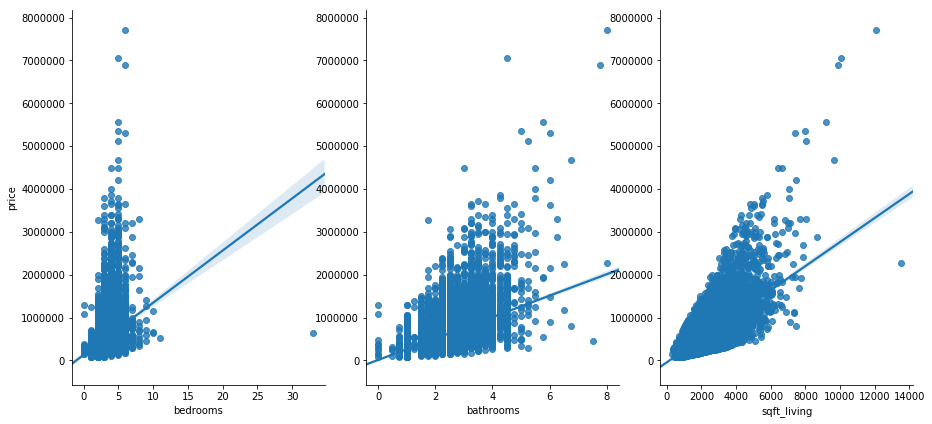

In [73]:
sns.pairplot(kc, x_vars = ["bedrooms", "bathrooms", "sqft_living"], y_vars = "price", size = 6, aspect =.7, kind = "reg")

In [76]:
kc.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [77]:
kc.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [103]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['bedrooms', 'bathrooms', 'view']
X = kc[feature_cols]
y = kc.price

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X,y)


# print the coefficients
print (linreg.coef_)
print (linreg.intercept_)

[  23032.24502314  208175.59844344  148833.64568434]
-12663.0129559


In [104]:
### STATSMODELS ###

# create a fitted model with all three features
lm = smf.ols(formula="price ~ bedrooms + bathrooms + sqft_living", data = kc).fit()

lm.params

#TV Coefficient is similar, radio is higher returns, newspaper is a non existent

Intercept      74847.140801
bedrooms      -57860.894321
bathrooms       7932.712223
sqft_living      309.392390
dtype: float64

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000000117CA748>>

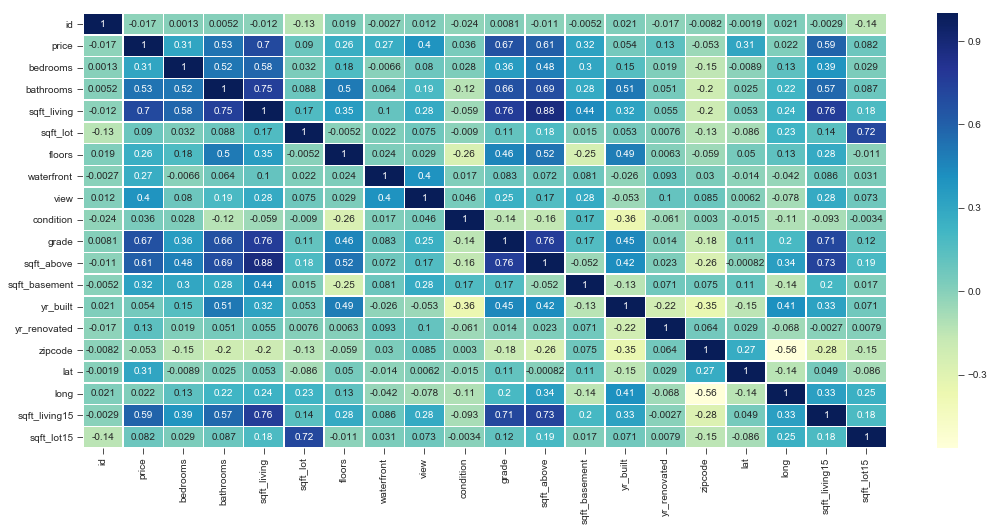

In [88]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.heatmap(kc.corr(), linewidths=.5, annot=True,cmap="YlGnBu")

In [107]:
# Intialize an empty model
lr = LinearRegression()

# Assign X and y
X = kc.drop("price", axis = 1)
# Choose the response variable(s)
y = kc.price
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

ValueError: invalid literal for float(): 20141015T000000